In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
# import plotly.express as px
# import plotly.graph_objects as go
# import plotly.figure_factory as ff
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# from nltk.tokenize import word_tokenize as wt 
# from collections import Counter
import gensim
# import textblob
import spacy

## **Plan of Action**

- Load the data
- Drop unnecessary columns and rows
- Removal of stop words.
- Feature engineering;
    - Glove-twitter-25
- Begin modelling
    - Algorithms to use;
        - k-Nearest Neighbors.
        - Decision Trees.
        - Random Forest.
        - Gradient Boosting.
        - Logistic Regression
- Evaluation;
    - F1-score_macro
    - AUC
    - ROC

In [3]:
df_clean = pd.read_csv('../../../cleaned_reviews.csv')

In [4]:
df_clean.shape

(17340, 4)

In [5]:
df_clean.columns

Index(['sentiments', 'cleaned_review', 'cleaned_review_length',
       'review_score'],
      dtype='object')

In [6]:
df_clean.drop(columns=['cleaned_review_length','review_score'],inplace=True)

Checking for Null Vaules and Duplicates

In [7]:
df_clean.isna().sum()

sentiments        0
cleaned_review    3
dtype: int64

In [8]:
df_clean.dropna(inplace=True)

In [9]:
df_clean.shape

(17337, 2)

In [10]:
# Removing several stop words
all_stopwords = {"'d","'ll","'m","'re","'s","'ve",'a','about',
'above','across','after','afterwards','again','all','almost','alone','along',
'already','also','although','always','am','among','amongst','amount','an','and',
'another','any','anyhow','anyone','anything','anyway','anywhere','are','around',
'as','at','back','be','became','because','become','becomes','becoming','been','before',
'beforehand','behind','being','below','beside','besides','between','both','bottom',
'but','by','ca','call','can','could','did','do','does','doing','done','down','due','during','each',
'eight','either','eleven','else','elsewhere','empty','even','everyone','everything',
'everywhere','except','few','fifteen','fifty','first','five','for','former','formerly','forty','four','from','front',
'full','further','go','had','has','have','he','hence','her','here','hereafter','hereby','herein','hereupon','hers',
'herself','him','himself','his','how','however','hundred','i','if','in','indeed','into','is','it','its','itself','just','keep','last',
'latter','latterly','made','make','many','may','me','meanwhile','might','mine','more','moreover','move','much',
'must','my','myself','name','namely','neither','nevertheless','next','nine','nobody','noone','nothing','now','nowhere','of','often',
'on','once','one','only','onto','or','other','others','otherwise','our','ours','ourselves','out','own','part','per','perhaps','please','put',
'rather','re','regarding','same','say','see','several','she','should','show','side',
'since','six','sixty','so','some','somehow','someone','something','sometime','sometimes','somewhere','still','such','take','ten','than','that','the','their',
'them','themselves','then','thence','there','thereafter','thereby','therefore','therein','thereupon','these','they','third','this','those','though','three',
'through','throughout','thru','thus','to','together','top','toward','towards','twelve','twenty','two','under','unless','until','up','upon','us','used','using',
'various','via','was','we','well','were','what','whatever','when','whence','whenever','where','whereafter','whereas','whereby','wherein','whereupon',
'wherever','whether','which','while','whither','who','whoever','whole','whom','whose','why','will','with','within','would','yet','you','your','yours','yourself',
'yourselves','‘d','‘ll','‘m','‘re','‘s','‘ve','’d','’ll','’m','’re','’s','’ve'}
my_stop_words = set(all_stopwords) # My own stop words

In [11]:
print(my_stop_words)

{'amongst', 'again', "'m", 'hence', 'they', 'somehow', 'itself', 'always', '‘ll', 'alone', 'then', 'side', 'that', 'were', 'much', 'become', 'whose', '‘re', 'it', 'do', "'s", 're', 'two', 'those', 'per', 'whereas', 'three', 'if', 'see', 'however', 'upon', 'each', 'am', 'its', 'last', 'would', 'are', 'four', 'anyway', 'who', 'being', 'name', 'could', 'on', 'at', "'ve", 'more', 'another', 'have', 'he', 'any', 'some', 'whenever', 'third', 'by', '’ve', "'d", 'until', 'front', 'nine', 'perhaps', 'after', 'almost', '’ll', 'either', 'my', 'few', 'is', 'up', 'when', 'noone', 'you', 'empty', 'next', 'hereupon', 'six', '’m', 'thereby', 'whereupon', '‘s', 'already', 'may', 'via', 'yours', 'whoever', 'therein', 'himself', 'and', 'once', 'thence', 'anyone', 'through', 'towards', 'meanwhile', 'above', 'be', 'now', 'to', 'ourselves', 'one', 'whom', 'only', 'namely', 'becomes', 'our', 'throughout', 'twenty', 'using', 'go', 'why', 'further', 'while', 'many', 'has', 'nevertheless', 'with', 'show', 'else

In [12]:
df_clean

,sentiments,cleaned_review
0,positive,i wish would have gotten one earlier love it a...
1,neutral,i ve learned this lesson again open the packag...
2,neutral,it is so slow and lags find better option
3,neutral,roller ball stopped working within months of m...
4,neutral,i like the color and size but it few days out ...
...,...,...
17335,positive,i love this speaker and love can take it anywh...
17336,positive,i use it in my house easy to connect and loud ...
17337,positive,the bass is good and the battery is amazing mu...
17338,positive,love it


In [13]:
nlp = spacy.load("en_core_web_sm")

In [14]:
def spacy_tokeniser(sent):
    sent = sent.strip().lower()
    doc = nlp(sent)
    mytokens = [token.lemma_ for token in doc if token.text not in my_stop_words]
    return mytokens

In [15]:
df_clean['tokens']= df_clean['cleaned_review'].apply(spacy_tokeniser)

In [16]:
df_clean.head()

,sentiments,cleaned_review,tokens
0,positive,i wish would have gotten one earlier love it a...,"[wish, get, early, love, make, work, laptop, e..."
1,neutral,i ve learned this lesson again open the packag...,"[ve, learn, lesson, open, package, use, produc..."
2,neutral,it is so slow and lags find better option,"[slow, lag, find, well, option]"
3,neutral,roller ball stopped working within months of m...,"[roller, ball, stop, work, month, minimal, use..."
4,neutral,i like the color and size but it few days out ...,"[like, color, size, day, return, period, not, ..."


In [17]:
# Dropping unnecessary columns
df_clean.drop(columns=['cleaned_review'],inplace=True)

Sentiment Mapping

In [18]:
sentiment_mapping = {'negative':-1,'neutral':0,'positive':1}
df_clean['sentiment_label'] = df_clean.sentiments.map(sentiment_mapping)

In [19]:
df_clean.drop(columns=['sentiments'],inplace=True)

In [20]:
import pickle
# Loading saved word2vec glove_twitter_25.pkl
vectorizer = pickle.load(open('../../../../../../word2vec_files/glove_twitter_25.pkl', "rb"))

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,cross_val_score

# The algorithms
import xgboost as xgb

In [22]:
df_clean

,tokens,sentiment_label
0,"[wish, get, early, love, make, work, laptop, e...",1
1,"[ve, learn, lesson, open, package, use, produc...",0
2,"[slow, lag, find, well, option]",0
3,"[roller, ball, stop, work, month, minimal, use...",0
4,"[like, color, size, day, return, period, not, ...",0
...,...,...
17335,"[love, speaker, love, charge, phone, work, no,...",1
17336,"[use, house, easy, connect, loud, clear, music]",1
17337,"[bass, good, battery, amazing, well, charge, t...",1
17338,[love],1


In [23]:
# Vecctoriser of Word2vec
def sent_vec(sent):
    vector_size = vectorizer.vector_size
    w2v_resolution = np.zeros(vector_size)
    # print(w2v_resolution)
    ctr = 1
    for w in sent:
        if w in vectorizer:
            ctr += 1
            w2v_resolution += vectorizer[w]
    w2v_resolution = w2v_resolution/ctr
    # print(w2v_resolution)
    return w2v_resolution

In [24]:
df_clean["vectors"] = df_clean['tokens'].apply(sent_vec)

In [25]:
df_clean.sample(n=5,random_state=42)

,tokens,sentiment_label,vectors
14785,"[meet, need]",0,"[-0.19399933516979218, 0.6811599930127462, -0...."
14534,"[shop, great, speaker, sound, excellent, very,...",1,"[-0.4735154937952757, -0.029290000908076763, -..."
16246,"[no, light, show, charge, not, turn, light, ch...",-1,"[0.001169282410826002, 0.2442825013505561, 0.0..."
6385,"[connectivity, issue, right, box, contact, sel...",0,"[-0.012982209360128954, 0.28078810066769, -0.3..."
424,"[don, buy, very, inconvenient, rechargeable, n...",-1,"[-0.07953007304324554, 0.1308529978761306, 0.1..."


In [26]:
X  =df_clean['vectors'].to_list()
y = df_clean['sentiment_label'].to_list()

In [27]:
from sklearn.model_selection import GridSearchCV

In [35]:
X_train, X_test, y_train,y_test= train_test_split(
                                            X,y,test_size=.2,random_state=42, 
                                            stratify=y)

In [37]:
pipe = Pipeline([('clf',xgb.XGBClassifier(
                    objective='multi:softmax',
                    num_class=3,
                    nthread=4,
                    seed=42))])

In [40]:
paramter_grid = {
                'clf__learning_rate':[0.3,0.5,0.7],
                # 'clf__n_estimators':[10,100,200,300],
                # 'clf__subsample':[0.5,0.8,1],
                # 'clf__max_depth':[3,5,6],
                "clf__objective":['multi:softmax'],
                'clf__gamma':[0,1], # the more conservative the algorithm will be
                # 'clf__min_child_weight':[1,2,3], # the more conservative the algorithm will be
                }
my_cv = StratifiedShuffleSplit(n_splits=5,test_size=.1,random_state=42)

In [41]:
mygrid = GridSearchCV(pipe,param_grid=paramter_grid,cv=my_cv,scoring='f1_macro')
mygrid.fit(X_train,y_train)

[12:30:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:30:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:31:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:31:38] WARNI

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.1,
            train_size=None),
             estimator=Pipeline(steps=[('clf',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rat...
                                                      n_estimators=100,
        

In [42]:
print(f"Best params: {mygrid.best_params_}\n")
print(f"Best estimator: {mygrid.best_estimator_}\n")
print(f"Best validation score: {mygrid.best_score_}")

Best params: {'clf__gamma': 0, 'clf__learning_rate': 0.5, 'clf__objective': 'multi:softmax'}

Best estimator: Pipeline(steps=[('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.5,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, nthread=4, num_class=3,
                               num_parallel_tree=1, objective='multi:softprob',
                               predictor='auto', random_state=42, reg_alpha=0,
                               reg_lambda=1, scale_pos_weight=None, seed=42

In [44]:
mygrid_trainset = mygrid.best_estimator_
mygrid_trainset

# clf  = xgb.XGBClassifier(
#                     objective='multi:softmax',
#                     num_class=3,
#                     nthread=4,
#                     gamma=0,
#                     learning_rate= 0.5,
#                     seed=42)
# Best validation score: 0.7600490529109003

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.5,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, nthread=4, num_class=3,
                               num_parallel_tree=1, objective='multi:softprob',
                               predictor='auto', random_state=42, reg_alpha=0,
                               reg_lambda=1, scale_pos_weight=None, seed=42,
                               subsample=1, tree_method='exact', ...))])

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1227
           0       1.00      1.00      1.00      5040
           1       1.00      1.00      1.00      7602

    accuracy                           1.00     13869
   macro avg       1.00      1.00      1.00     13869
weighted avg       1.00      1.00      1.00     13869



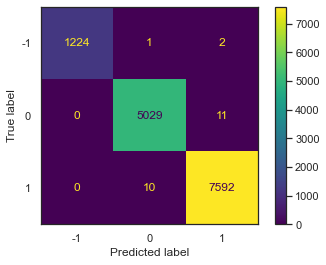

In [45]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
y_pred_train = mygrid_trainset.predict(X_train)



y_train = y_train
sns.set_theme(style='white')
def class_report(model,y_train,y_pred_train):
    print(classification_report(y_train,y_pred_train))
    cm = confusion_matrix(y_train,y_pred_train,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()


class_report(mygrid_trainset,y_train,y_pred_train)

**ROC on training data**

In [46]:
X = df_clean['vectors'].tolist()
y = df_clean['sentiment_label'].tolist()

In [47]:
X_train, X_test, y_train,y_test= train_test_split(
                                            X,y,test_size=.2,random_state=42, 
                                            stratify=y)


# # Without PCA
clf  = xgb.XGBClassifier(
                    objective='multi:softmax',
                    num_class=3,
                    nthread=4,
                    gamma=0,
                    learning_rate= 0.5,
                    seed=42)

[12:53:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


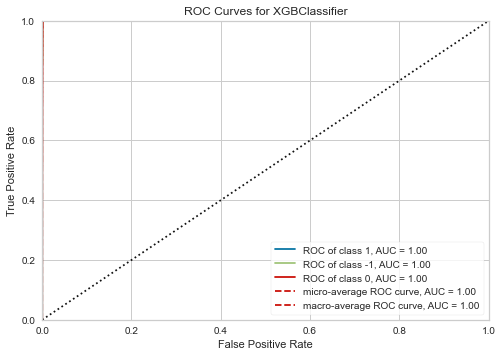

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [48]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(clf, classes=[-1,0,1])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_train, y_train)        # Evaluate the model on the training data
visualizer.show() 
# Without PCA: AUC score using OvR, macro-averaged over all classes: 0.99

**Building the model with best estimator and testing on test data**

In [49]:
X = df_clean['vectors'].tolist()
y = df_clean['sentiment_label'].tolist()

In [50]:
X_train, X_test, y_train,y_test= train_test_split(
                                            X,y,test_size=.2,random_state=42, 
                                            stratify=y)


# Without PCA
clf  = xgb.XGBClassifier(
                    objective='multi:softmax',
                    num_class=3,
                    nthread=4,
                    gamma=0,
                    learning_rate= 0.5,
                    seed=42)
clf.fit(X_train,y_train)

[12:55:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4, nthread=4,
              num_class=3, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, seed=42, subsample=1, tree_method='exact', ...)

              precision    recall  f1-score   support

          -1       0.82      0.52      0.64       307
           0       0.79      0.78      0.79      1260
           1       0.85      0.90      0.88      1901

    accuracy                           0.83      3468
   macro avg       0.82      0.74      0.77      3468
weighted avg       0.82      0.83      0.82      3468



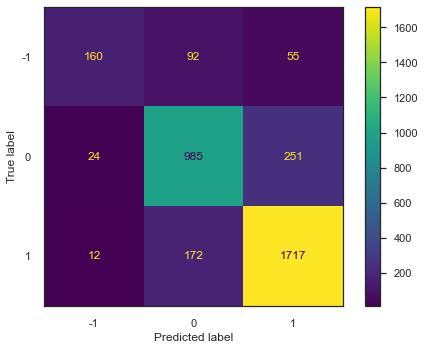

In [51]:
# Classification report test data
y_test = y_test
y_pred_test = clf.predict(X_test)
sns.set_theme(style='white')
def class_report(model,y_test,pred):
    print(classification_report(y_test,pred))
    cm = confusion_matrix(y_test,pred,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()


class_report(clf,y_test,y_pred_test)

**ROC on test data**

In [52]:
X = df_clean['vectors'].tolist()
y = df_clean['sentiment_label'].tolist()

In [53]:
X_train, X_test, y_train,y_test= train_test_split(
                                            X,y,test_size=.2,random_state=42, 
                                            stratify=y)


# Without PCA
clf  = xgb.XGBClassifier(
                    objective='multi:softmax',
                    num_class=3,
                    nthread=4,
                    gamma=0,
                    learning_rate= 0.5,
                    seed=42)

[12:56:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


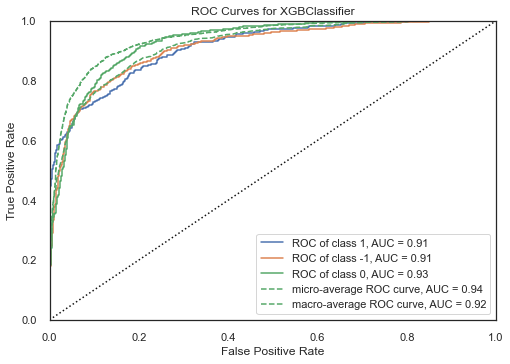

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [54]:
# Without PCA
visualizer = ROCAUC(clf, classes=[-1,0,1])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

## **Conclusion**

- Using glove-twitter-25 word embeddings has shown great performance with XGB Classifier better than KNN classifier as expected.
- Also the stopwords were modified for deployment purposes on streamlit.


**Table of Values**

dataset|f1_score_macro_avg|AUC_score_avg
| ----------- | ----------- | ----------- |
df_clean_(train data)|1.00|1.00
df_clean (test data)|0.77|0.92

In [55]:
clf.fit(X_train, y_train)
pickle.dump(clf,open("xgb_25.pkl",'wb'))

[13:00:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
